In [2]:
# Data handling and plotting
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser  # More robust date parsing

# MongoDB
from pymongo import MongoClient
from bson import ObjectId


C:\Users\xande\AppData\Local\Temp\ipykernel_23448\1992059299.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
client = MongoClient("mongodb://localhost:27017")

db = client["lifesnaps"] 
collection = db["fitbit"]

userID = ObjectId("621e2f9167b776a240011ccb")

In [4]:
# Define user ID and query
user_id = ObjectId("621e2f9167b776a240011ccb")

query = {
    "id": user_id,
    "type": "Daily Heart Rate Variability Summary"
}

# Execute query and sort by timestamp
cursor = collection.find(query).sort("data.timestamp", 1)
docs = list(cursor)

print(f"Aantal documenten gevonden: {len(docs)}")


Aantal documenten gevonden: 87


In [5]:
# Prepare lists to hold the data
dates = []
rmssd_values = []
entropy_values = []

# Loop through documents and extract values
for doc in docs:
    data = doc.get("data", {})
    timestamp = data.get("timestamp")
    rmssd = data.get("rmssd")
    entropy = data.get("entropy")
    
    # Robust datetime parsing
    if timestamp and rmssd is not None and entropy is not None:
        if not isinstance(timestamp, datetime):
            timestamp = parser.parse(timestamp)
        dates.append(timestamp)
        rmssd_values.append(rmssd)
        entropy_values.append(entropy)

# Preview first few entries
for i in range(min(5, len(dates))):
    print(f"{i+1}: Date={dates[i]}, RMSSD={rmssd_values[i]}, Entropy={entropy_values[i]}")


1: Date=2021-10-24 00:00:00, RMSSD=28.4, Entropy=2.286
2: Date=2021-10-25 00:00:00, RMSSD=23.568, Entropy=2.109
3: Date=2021-10-26 00:00:00, RMSSD=17.974, Entropy=2.278
4: Date=2021-10-27 00:00:00, RMSSD=19.41, Entropy=2.613
5: Date=2021-10-28 00:00:00, RMSSD=19.028, Entropy=2.443


In [6]:
# Create DataFrame
df = pd.DataFrame({
    "date": dates,
    "RMSSD": rmssd_values,
    "Entropy": entropy_values
})

# Ensure proper datetime format and sort
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# Preview
df.head()


,date,RMSSD,Entropy
0,2021-10-24,28.400,2.286
1,2021-10-25,23.568,2.109
2,2021-10-26,17.974,2.278
3,2021-10-27,19.410,2.613
4,2021-10-28,19.028,2.443


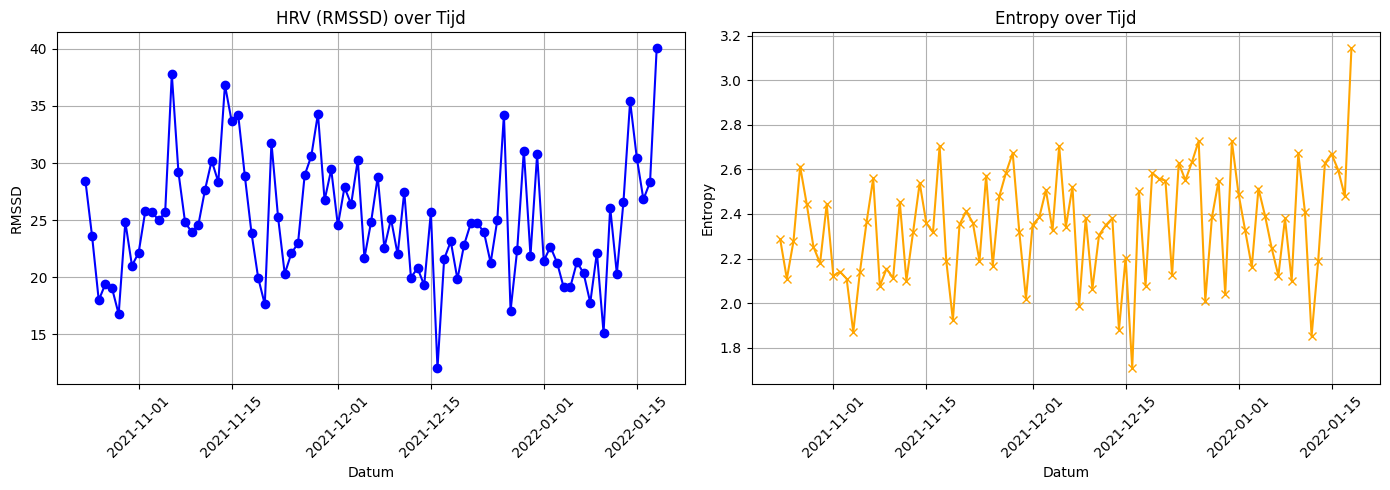

In [9]:
# Plot HRV (RMSSD) and Entropy over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# HRV (RMSSD)
ax1.plot(df["date"], df["RMSSD"], marker='o', color='blue')
ax1.set_title("HRV (RMSSD) over Tijd")
ax1.set_xlabel("Datum")
ax1.set_ylabel("RMSSD")
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Entropy
ax2.plot(df["date"], df["Entropy"], marker='x', color='orange')
ax2.set_title("Entropy over Tijd")
ax2.set_xlabel("Datum")
ax2.set_ylabel("Entropy")
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:

# Save to file if needed
df.to_csv("csv/HRV.csv", index=False)




Hartslagvariabiliteit (HRV) is de variatie in tijd tussen opeenvolgende hartslagen. 
Het is een belangrijke indicator van de activiteit en balans van het autonome zenuwstelsel. 
Een hogere HRV betekent dat je lichaam beter kan reageren op stress en veranderingen, en wordt vaak geassocieerd met een goede gezondheid en herstel.

Entropie is een maat voor de complexiteit en onvoorspelbaarheid van je hartslagpatroon. 
Een hoge entropie betekent dat je hartslag meer variatie en complexiteit heeft, wat meestal wijst op een gezond en veerkrachtig zenuwstelsel.
Een lage entropie betekent een voorspelbaarder patroon, wat kan duiden op stress, vermoeidheid of een minder flexibel zenuwstelsel.

Samengevat:
- HRV hoog + Entropie hoog = Gezonde, flexibele hartslagregulatie
- HRV laag + Entropie laag = Mogelijke stress of vermoeidheid